**Defining Dataset**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Xs = np.array([[1, 1], [-1, 1], [1, -1]])
ys = np.array([1, -1, -1])

**Implementing the soft SVM learning algorithm**

In [ ]:
# The soft SVM class

class Soft_SVM:
    def __init__(self, n_iter=50):
        self.n_iter = n_iter

    def fit(self, X, y, learning_rate = 0.01, regularization = 0):
        self.w_ = np.array([np.float_(0.)] * X.shape[1])
        self.b_ = np.float_(0.)
        # self.rlm_ = []
        m = len(y)

        for _ in range(self.n_iter):
            g_w = regularization * self.w_
            g_b = np.float_(0.)
            for xi, target in zip(X, y):
                if((target * self.net_input(xi)) <= 1):
                    g_w -= target * xi / m
                    g_b -= target / m
            # self.rlm_.append(np.mean(np.maximum(1 - y * self.net_input(X), 0)) + (regularization / 2) * np.sum(self.w_ ** 2))
            self.w_ -= learning_rate * g_w
            self.b_ -= learning_rate * g_b
        return self

    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        return np.where(self.net_input(X) >= 0, 1, -1)

**Plotting the decision regions**

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')


**Training soft SVM**

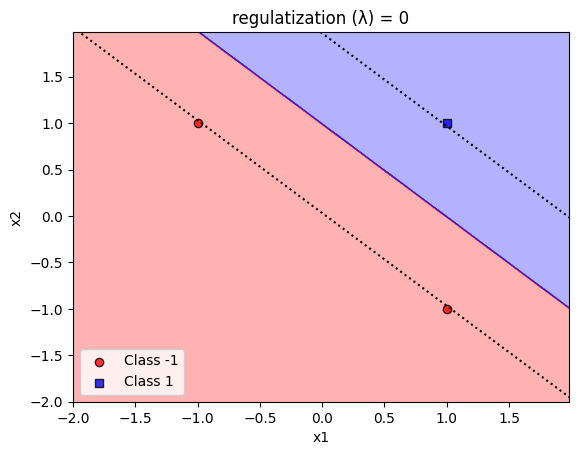

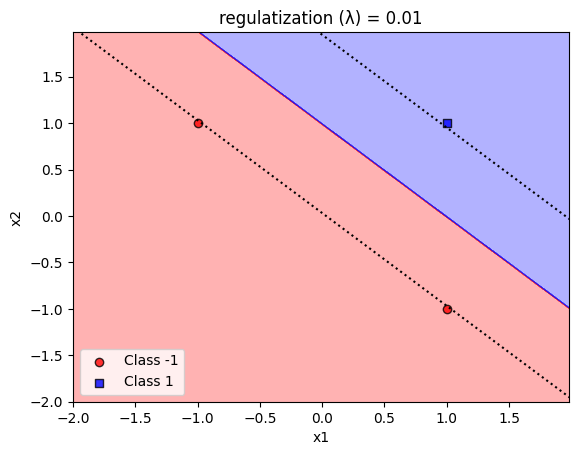

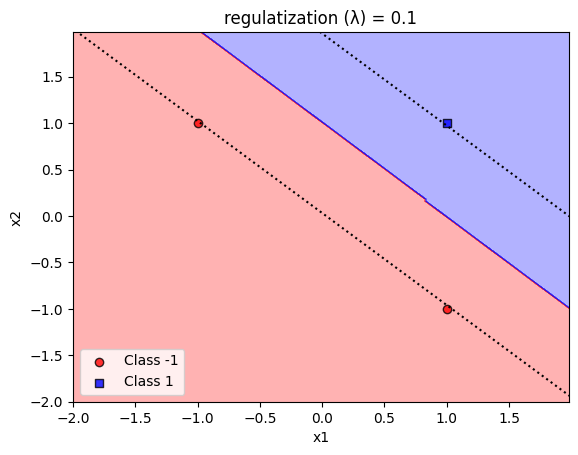

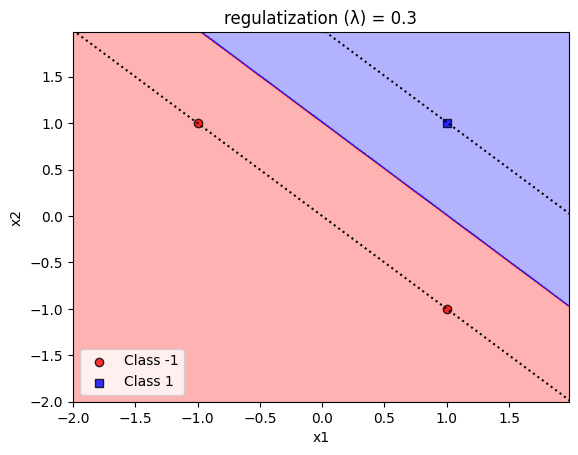

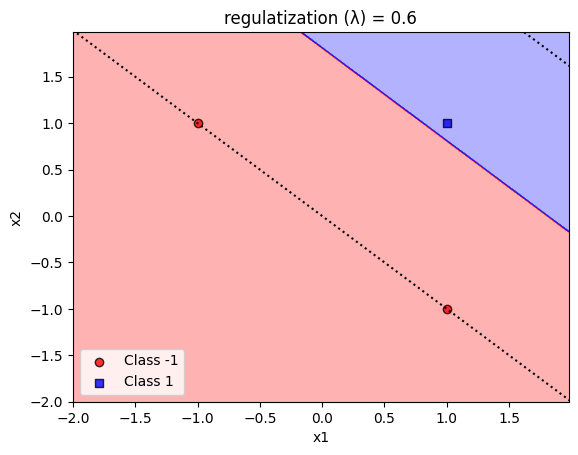

In [ ]:
# Train a soft SVM
svm = Soft_SVM(n_iter=200)
regularizations = [0, 0.01, 0.1, 0.3, 0.6]
learning_rates = [0.1, 0.1, 0.1, 0.1, 0.1] # converges

x = np.arange(-10, 10)

for lr, reg in zip(learning_rates, regularizations):
    # Train a soft SVM
    svm.fit(Xs, ys, lr, reg)
    plot_decision_regions(Xs, ys, svm)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(f'regulatization (λ) = {reg}')
    plt.legend(loc='lower left')
    y1 = -(svm.w_[0] / svm.w_[1]) * x + (1 - svm.b_) / svm.w_[1]
    y2 = -(svm.w_[0] / svm.w_[1]) * x + (- 1 - svm.b_) / svm.w_[1]
    plt.plot(y1, x, color='black', linestyle='dotted')
    plt.plot(y2, x, color='black', linestyle='dotted')
    plt.show()

We can observe how the choice of the regularization parameter λ affects the output predictor.
The larger λ means a larger margin but allows for more violations, while a smaller λ means less violations but causes a smaller margin.